In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("datasets/telomerase_06_descriptorsx.csv")
df

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,FP10,...,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.136677
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
2,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.022276
4,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1,1,0,1,1,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.221849
661,1,1,0,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.040959
662,0,1,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.251812
663,0,1,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.008774


In [3]:
df = df.dropna()
df

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,FP10,...,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.136677
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
2,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.022276
4,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1,1,0,1,1,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.221849
661,1,1,0,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.040959
662,0,1,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.251812
663,0,1,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.008774


In [4]:
X = df.drop("pIC50", axis=1)
y = df["pIC50"]

In [5]:
X.shape

(664, 16092)

Remove low variance features

In [6]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(664, 2266)

Split the train and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model Training

Train a XGBRegressor model

In [8]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [9]:
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)

Learning rate set to 0.037046
0:	learn: 0.9508921	total: 159ms	remaining: 2m 38s
1:	learn: 0.9439639	total: 178ms	remaining: 1m 28s
2:	learn: 0.9365456	total: 197ms	remaining: 1m 5s
3:	learn: 0.9279761	total: 216ms	remaining: 53.7s
4:	learn: 0.9219849	total: 234ms	remaining: 46.5s
5:	learn: 0.9146200	total: 251ms	remaining: 41.7s
6:	learn: 0.9078203	total: 271ms	remaining: 38.4s
7:	learn: 0.9006756	total: 288ms	remaining: 35.8s
8:	learn: 0.8941816	total: 307ms	remaining: 33.8s
9:	learn: 0.8897773	total: 325ms	remaining: 32.2s
10:	learn: 0.8848885	total: 343ms	remaining: 30.8s
11:	learn: 0.8789095	total: 361ms	remaining: 29.8s
12:	learn: 0.8724620	total: 379ms	remaining: 28.8s
13:	learn: 0.8685098	total: 397ms	remaining: 28s
14:	learn: 0.8636384	total: 416ms	remaining: 27.3s
15:	learn: 0.8581325	total: 434ms	remaining: 26.7s
16:	learn: 0.8541815	total: 453ms	remaining: 26.2s
17:	learn: 0.8500796	total: 471ms	remaining: 25.7s
18:	learn: 0.8449224	total: 489ms	remaining: 25.2s
19:	learn: 

In [10]:
y_train_pred = regressor.predict(X_train)

In [11]:
print(f"Training R2 = {r2_score(y_train, y_train_pred):.3f}")
print(f"Training RMSE = {mean_squared_error(y_train, y_train_pred, squared=False):.3f}")

Training R2 = 0.937
Training RMSE = 0.240


## Model Evaluation

Predict on test set

In [12]:
y_test_pred = regressor.predict(X_test)

In [13]:
print(f"Testing R2 = {r2_score(y_test, y_test_pred):.3f}")
print(f"Testing RMSE = {mean_squared_error(y_test, y_test_pred, squared=False):.3f}")

Testing R2 = 0.377
Testing RMSE = 0.783


<function matplotlib.pyplot.show(close=None, block=None)>

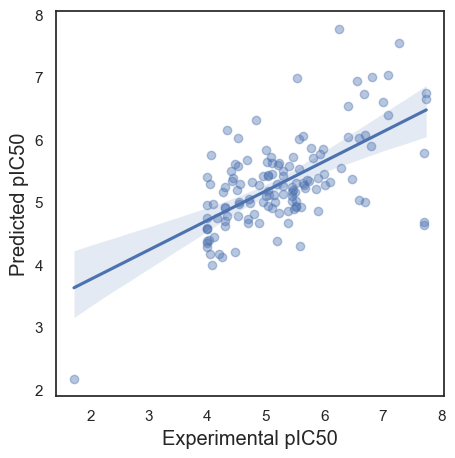

In [14]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large')
ax.set_ylabel('Predicted pIC50', fontsize='large')
ax.figure.set_size_inches(5, 5)
plt.show

## Use LazyPredict

In [15]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [16]:
regressor = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = regressor.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = regressor.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [09:08<00:00, 13.06s/it] 


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [09:05<00:00, 12.98s/it] 


In [17]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
QuantileRegressor,95041069854628659948960032463839430812738313311...,-3113043344672365457876439814493100941201905920...,53463756585288071210921893946838251142107675922...,353.80
SGDRegressor,211318176825836704890880.00,-692166707489910485417984.00,797209086630.49,0.10
Lars,100.56,-325.12,17.30,0.27
KernelRidge,10.32,-29.51,5.29,0.08
LassoLars,1.31,0.00,0.96,0.08
DummyRegressor,1.31,0.00,0.96,0.07
ElasticNet,1.31,0.00,0.96,0.07
Lasso,1.31,0.00,0.96,0.07
LarsCV,1.25,0.19,0.86,5.89


In [18]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
QuantileRegressor,17962226874830626394844712446501060338623745632...,-2903893344764284314539034243223685515399379526...,53463756585288071210921893946838251142107675922...,351.31
SGDRegressor,54296049649551218311168.00,-877786136001077959458816.00,929530187932.69,0.09
LinearRegression,3262489307516974923776.00,-52743577138191090581504.00,227852569534.21,0.26
TransformedTargetRegressor,3262489307516974923776.00,-52743577138191090581504.00,227852569534.21,0.26
Lars,9820.83,-158752.85,395.30,0.26
KernelRidge,2.80,-28.09,5.35,0.06
GaussianProcessRegressor,2.66,-25.87,5.14,0.31
OrthogonalMatchingPursuit,1.13,-1.07,1.43,0.11
LinearSVR,1.09,-0.51,1.22,1.48


[(0.0, 1.0)]

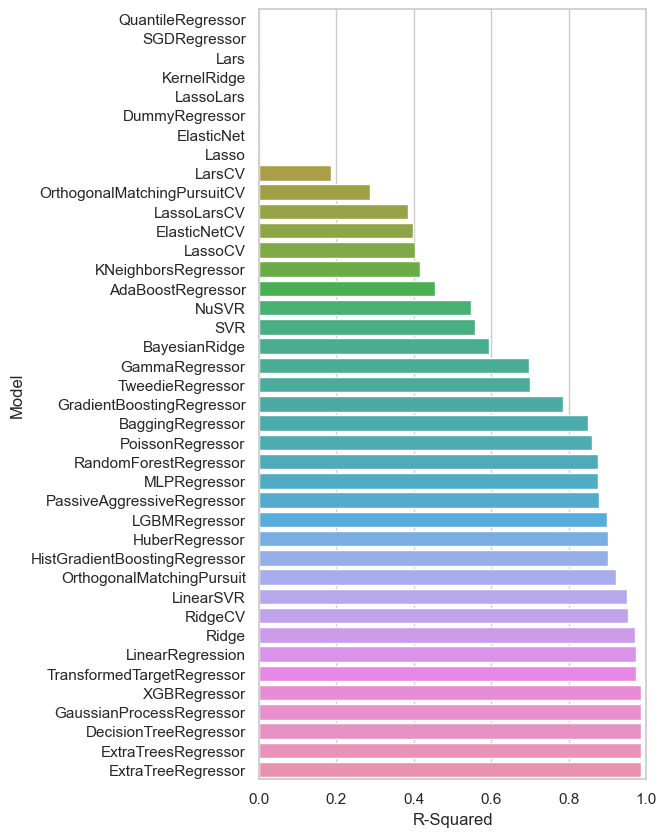

In [19]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

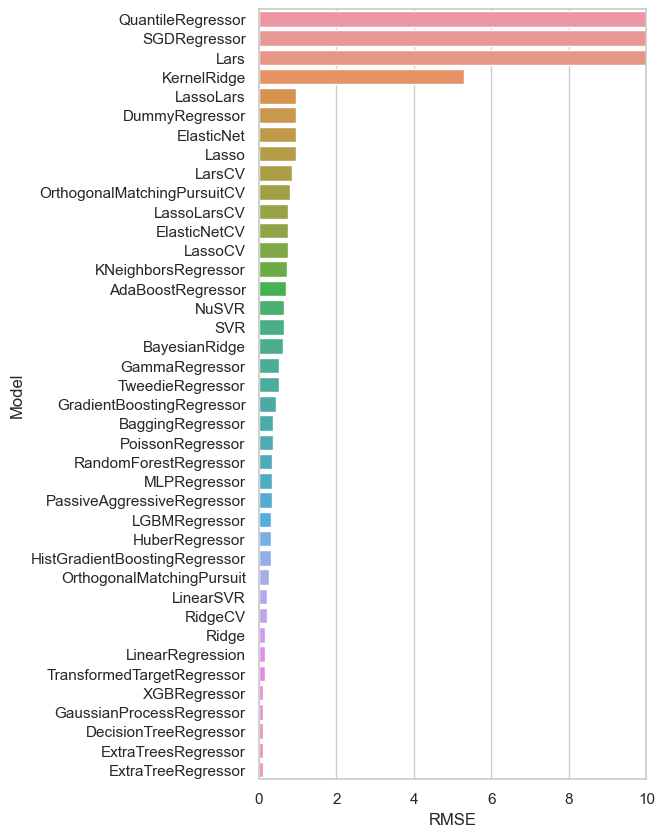

In [20]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

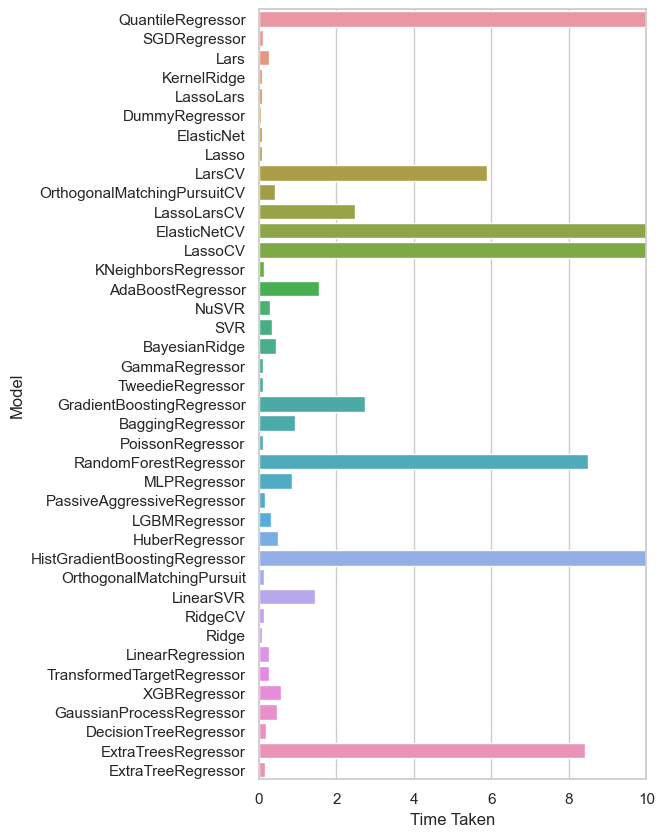

In [21]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))